In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import Ridge, ElasticNet, LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, mean_squared_error,precision_recall_curve,roc_curve
from sklearn.model_selection import train_test_split, cross_validate,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
df = pd.read_csv('hearing_test.csv')

In [7]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [9]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


<Axes: xlabel='age', ylabel='physical_score'>

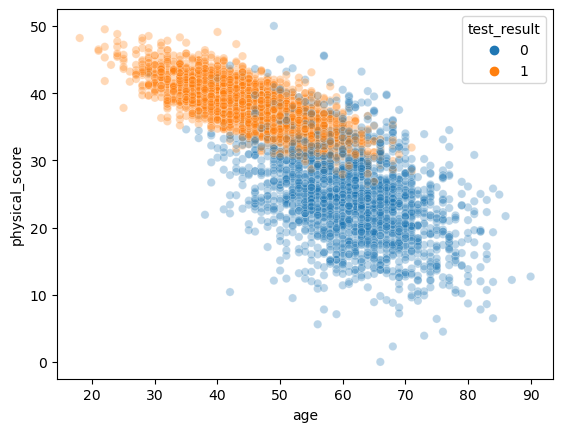

In [11]:
sns.scatterplot(x='age',y='physical_score',data=df,hue='test_result',alpha=0.3)

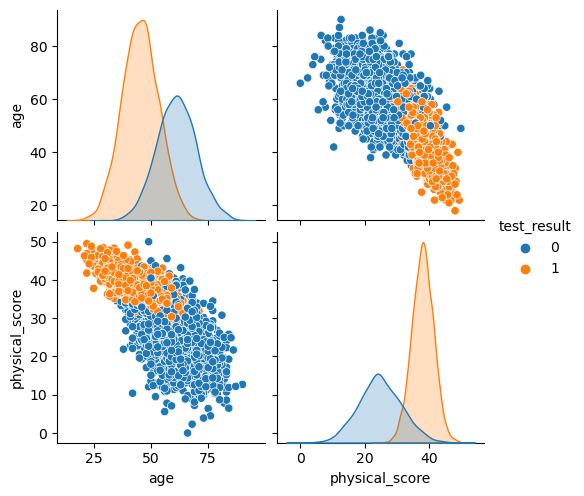

In [13]:
sns.pairplot(df,hue='test_result')

<Axes: >

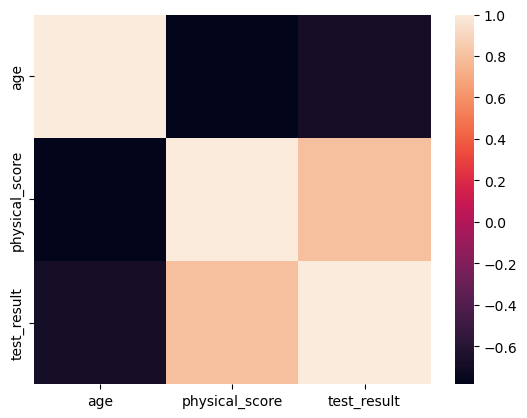

In [15]:
sns.heatmap(df.corr())

In [17]:
X = df.drop('test_result',axis=1)
y = df['test_result']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [21]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [23]:
log_model = LogisticRegression()

In [25]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [27]:
log_model.coef_

array([[-0.95017725,  3.46148946]])

In [76]:
y_pred = log_model.predict(scaled_X_test)
cm = confusion_matrix(y_test, y_pred,normalize='true')

In [57]:
accuracy_score(y_test,y_pred)

0.93

In [78]:
cm

array([[0.89119171, 0.10880829],
       [0.04560261, 0.95439739]])

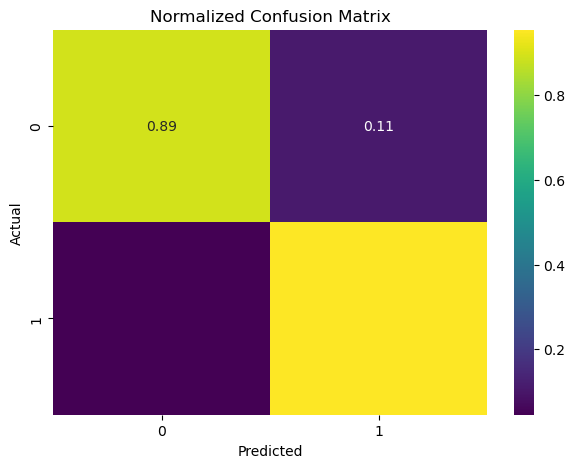

In [63]:
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [87]:
y_scores = log_model.decision_function(scaled_X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

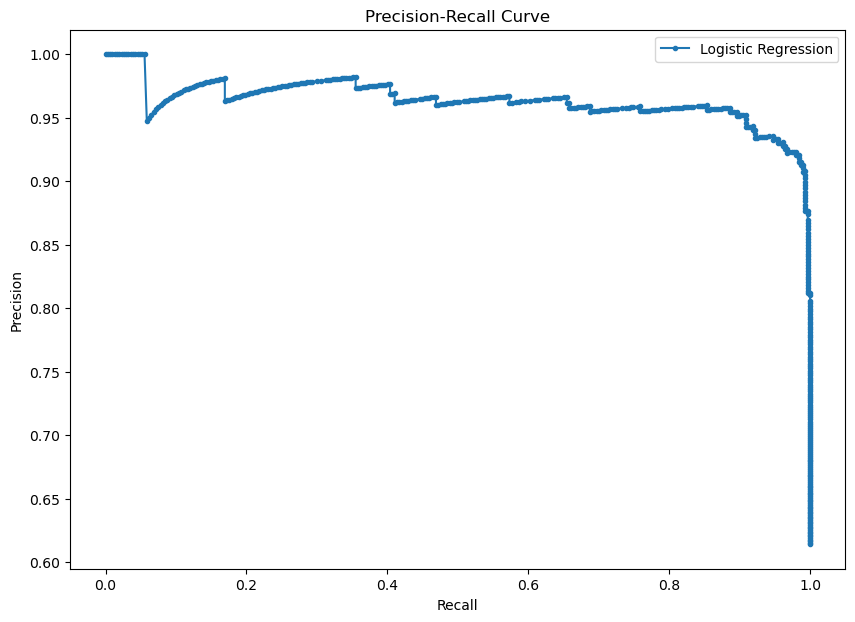

In [89]:
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, marker='.', label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [103]:
fpr,tpr,thresholds= roc_curve(y_test, y_scores);

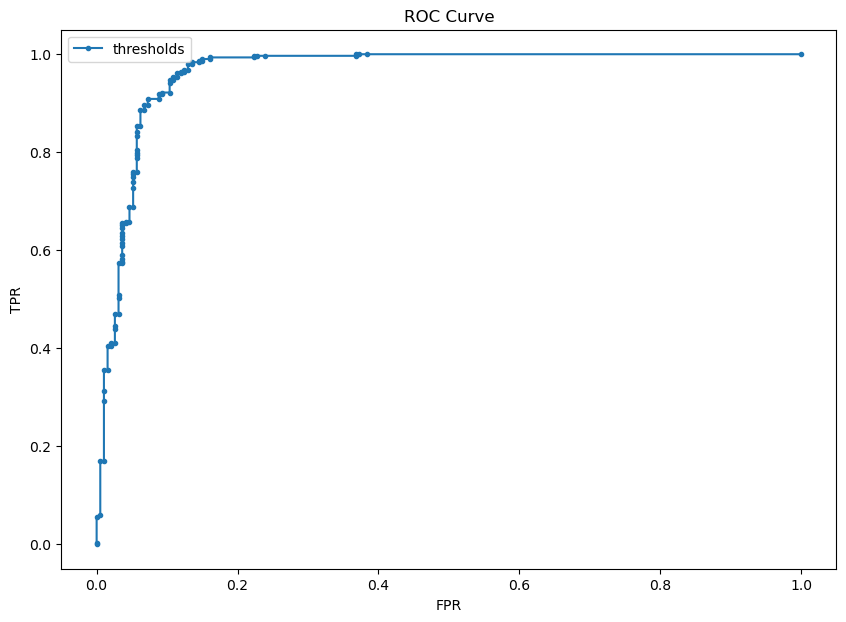

In [108]:
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, marker='.', label='thresholds')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.show()